# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  10 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=090f70fdd9e7c5893c23d43106217e9d660b841ff4bd55feb41c9e8a45ebdb0a
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [4]:
import torchviz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.autograd import grad
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import precision_recall_fscore_support as all_metrics
from sklearn.metrics import accuracy_score

from collections import defaultdict

from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

from IPython.display import clear_output

In [ ]:
sns.set(palette='Set2', font_scale=1.2)
%matplotlib inline

In [ ]:
device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

### Задача 1. Дифференцирование

Для функции

$$ f(x, y, z)=\left(\frac{y^4}{1+e^{-x}}\right)^3 + z$$

С помощью Pytorch:

- постройте вычислительный граф с возможностью считать производные по x, y.

- выведите все узлы полученного графа и их атрибуты (рассмотренные на лекции)

- объясните, почему атрибуты принимают такие значения

Для точки (1, 3, 2):

- посчитайте для функции все возможные первые частные производные методом backward()

- посчитайте для функции все возможные вторые частные производные

In [ ]:
x = torch.tensor(1, requires_grad=True, dtype=torch.float)
y = torch.tensor(3, requires_grad=True, dtype=torch.float)
z = torch.tensor(2, requires_grad=True, dtype=torch.float)

In [ ]:
f = (y**4/(1+torch.exp(-x)))**3+z


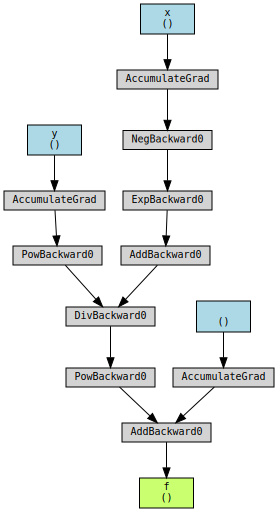

In [ ]:
from torchviz import make_dot
make_dot(f, params={'x': x, 'y': y, 'f': f})

In [ ]:
f.backward()

In [ ]:
y.grad

tensor(830561.2500)

In [ ]:
x.grad

tensor(167529.2500)

Если считать произвводную аналитически, то результат получается другим, вероятно, это связано с накоплением ошибок при округлении.

In [ ]:
print("Атрибуты х: ", x.requires_grad, x.is_leaf)
print("Атрибуты у: ", y.requires_grad, y.is_leaf)
print("Атрибуты z: ", z.requires_grad, z.is_leaf)
print("Атрибуты f: ", f.requires_grad, f.is_leaf)

Атрибуты х:  True True
Атрибуты у:  True True
Атрибуты z:  True True
Атрибуты f:  True False


x, y, z являются листьями графа, а f - нет, он был создан в результате работы над другими тензорами

In [ ]:
print("Первая производная по  x: ", x.grad.item())
print("Первая производная по  y: ", y.grad.item())
print("Первая производная по  z: ", z.grad.item())

Первая производная по  x:  167529.25
Первая производная по  y:  830561.25
Первая производная по  z:  1.0


In [ ]:
x_grad = x.grad.clone().detach().requires_grad_()
y_grad = y.grad.clone().detach().requires_grad_()
z_grad = z.grad.clone().detach().requires_grad_()

x.grad.zero_()
y.grad.zero_()
z.grad.zero_()


x_grad.backward(retain_graph=True)
y_grad.backward(retain_graph=True)
z_grad.backward(retain_graph=True)

print("Вторая производная по x: ", x_grad.grad.item())
print("Вторая производная по y: ", y_grad.grad.item())
print("Вторая производная по x: ", z_grad.grad.item())

Вторая производная по x:  1.0
Вторая производная по y:  1.0
Вторая производная по x:  1.0


### Задача 2.
#### Профиль физика

Скачайте [датасет](https://disk.yandex.ru/d/LighhESdTbYk6Q), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)

Удалите столбцы 'Unnamed: 0	', 'Run' и 'Event', так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Убедитесь, что классы сбалансированны.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец 'class') к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.

**Далее идёт предобработка биологического датасета, которую можно удалить, если вы работаете с физическим. После этого блока (см. ниже) идёт общая часть с созданием, обучением и тестированием нейросети.**

#### Профиль биология

Скачайте [датасет](https://disk.yandex.ru/d/FVoQGn5q1td7Vw), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [5]:
df = pd.read_csv('/content/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [6]:
data = df.iloc[:, :-2]
target_smoking = df ["SMK_stat_type_cd"]
target_drinking = df ["DRK_YN"]

Проанализируйте датасет, разделяя его по:
* курит &mdash; 3
* курил, но бросил &mdash; 2
* никогда не курил &mdash; 1

SMK_stat_type_cd
1.0    602441
3.0    213954
2.0    174951
Name: count, dtype: int64


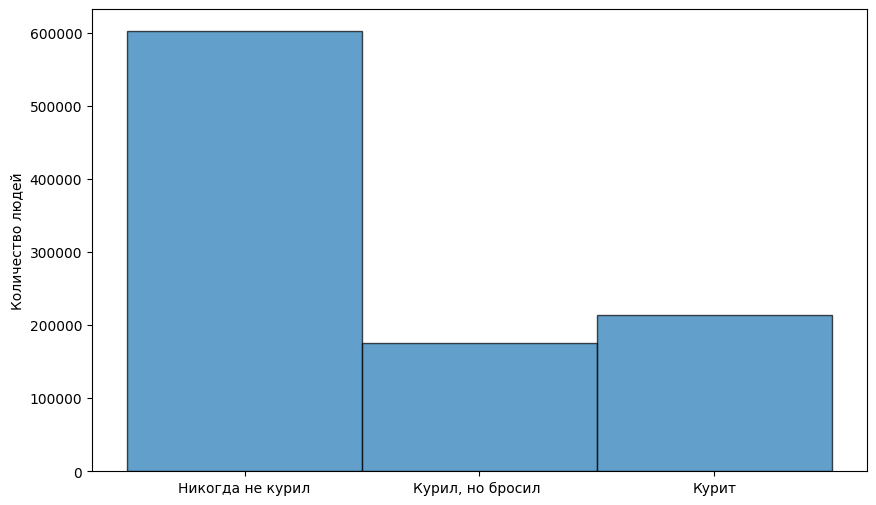

In [7]:
print(df["SMK_stat_type_cd"].value_counts())
plt.figure(figsize=(10, 6))
plt.hist(df["SMK_stat_type_cd"], bins=[1, 2, 3, 4], edgecolor='black', alpha=0.7)
plt.xticks([1.5, 2.5, 3.5], ['Никогда не курил', 'Курил, но бросил ', 'Курит'])
plt.ylabel('Количество людей')
plt.show()

Попробуем классифицировать людей с плохими привычками и без них. Для этого создайте дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [8]:
df["DRK_YN"] = target_drinking.apply(lambda x: 1 if x == 'N' else 2)
df["sex"] = target_drinking.apply(lambda x: 1 if x == 'Male' else 2)
df['has_bad_habits'] = df.apply(lambda row: 1 if row["SMK_stat_type_cd"] > 2 or row["DRK_YN"] > 1 else 0, axis=1)

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,has_bad_habits
0,2,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,2,1
1,2,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,1
2,2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,0
3,2,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,2,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0


Теперь смотрим на разделение по привычкам

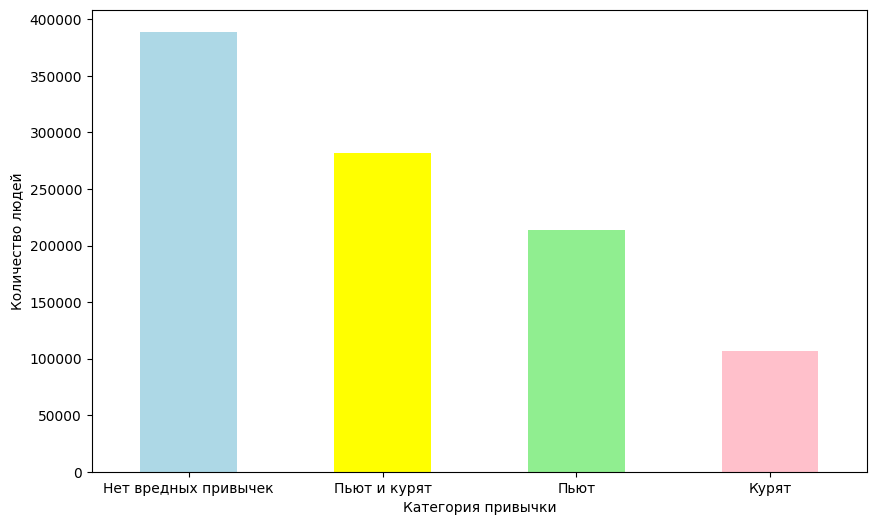

In [9]:
df['habit_category'] = df.apply(lambda row: 'Пьют и курят' if row["SMK_stat_type_cd"] > 1 and row["DRK_YN"] > 1 else ('Курят' if row["SMK_stat_type_cd"] > 1 else ('Пьют' if row["DRK_YN"] > 1 else 'Нет вредных привычек')), axis=1)
plt.figure(figsize=(10, 6))
df['habit_category'].value_counts().plot(kind='bar', color=['lightblue', 'yellow', 'lightgreen', 'pink'])
plt.ylabel('Количество людей')
plt.xlabel('Категория привычки')
plt.xticks(rotation=0)
plt.show()

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [10]:
needed_columns = ["sex", "age", "height", "weight", "waistline", "sight_left", "sight_right", "hear_left", "hear_right"]
y = df['has_bad_habits']
X = df[needed_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


#### Общая часть

In [11]:
class_lim_proba = 0.5 # критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Далее сформируйте датасет в pytorch-обертке

In [18]:
X_train = torch.tensor(np.array(X_train), dtype=torch.float32)
y_train = torch.tensor(np.array(y_train), dtype=torch.long)
X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.long)
X_val = torch.tensor(np.array(X_val), dtype=torch.float32)
y_val = torch.tensor(np.array(y_val), dtype=torch.long)

Напишите вспомогательные функции, в одной из которых будет проходить обучение, а во вторй - валидация. Также в отдельной функцией можно описать отрисовку кривых обучения. На одном графике расположите значение функции потерь на трейне и валидации, а на другом -- значение метрики качества на ваш выбор, также для трейна и валидации)

In [14]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    fig = plt.figure(figsize=(20,7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend();
    plt.show()


def train_epoch(model, criterion, opt, batch_generator, X_train, y_train, batch_size, device, class_lim_proba):
    model.train(True)
    train_loss = 0
    train_acc = 0
    num_train_batches = len(X_train) // batch_size

    for X_batch, y_batch in batch_generator(X_train, y_train, batch_size, device=device):
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()

        train_loss += loss.detach().cpu().numpy()
        y_pred_np = np.argmax(logits.detach().cpu().numpy(), axis=1)
        y_batch_np = y_batch.cpu().numpy()
        train_acc += (y_batch_np == y_pred_np).sum()

    train_loss /= num_train_batches
    train_acc /= num_train_batches * batch_size

    return train_loss, train_acc

def test_epoch(model, criterion, batch_generator, X_val, y_val, batch_size, device, class_lim_proba):
    model.eval()
    val_loss = 0
    val_acc = 0
    num_val_batches = len(X_val) // batch_size

    with torch.no_grad():
        for X_batch, y_batch in batch_generator(X_val, y_val, batch_size, device=device):
            logits = model(X_batch)
            loss = criterion(logits, y_batch)

            val_loss += loss.cpu().numpy().sum()
            y_pred_np = np.argmax(logits.cpu().numpy(), axis=1)
            y_batch_np = y_batch.cpu().numpy()
            val_acc += (y_batch_np == y_pred_np).sum()

    val_loss /= num_val_batches
    val_acc /= num_val_batches * batch_size

    return val_loss, val_acc


Создание модели

In [15]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 5)
        self.linear2 = nn.Linear(5, 2)

    def forward(self, x):
        x = self.linear1(nn.Flatten()(x))
        x = self.linear2(nn.ReLU()(x))
        return x

Обучение

In [16]:
import time
def train(
    model,
    criterion,
    optimizer,
    X_train, y_train,
    X_val, y_val,
    num_epochs=100,
    batch_size=64,
    model_path='model.pth',
    device='cuda' if torch.cuda.is_available() else 'cpu'
):
    """
    Обучение модели
    """
    model.to(device)
    history = defaultdict(lambda: defaultdict(list))
    best_val_acc = 0.

    for epoch in range(num_epochs):
        start_time = time.time()

        train_loss, train_acc = train_epoch(model, criterion, optimizer, X_train, y_train, batch_size, device)
        val_loss, val_acc = test_epoch(model, criterion, X_val, y_val, batch_size, device)

        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)

        if val_acc > best_val_acc:
            torch.save(model.state_dict(), model_path)
            best_val_acc = val_acc

        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training accuracy: \t\t\t{:.2f} %".format(train_acc * 100))
        print("  validation accuracy: \t\t\t{:.2f} %".format(val_acc * 100))

    return model, history


In [24]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
batch_size = 64
class_lim_proba = 0.5

history = defaultdict(lambda: defaultdict(list))
best_val_acc = 0.

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    num_train_batches = len(X_train) // batch_size


    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end].to(device)
        y_batch = y_train_shuffled[start:end].to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        y_pred = torch.argmax(logits, dim=1)
        train_acc += (y_pred == y_batch).sum().item()

    train_loss /= num_train_batches
    train_acc /= len(X_train)


    model.eval()
    val_loss = 0
    val_acc = 0
    num_val_batches = len(X_val) // batch_size

    with torch.no_grad():
        for start in range(0, len(X_val), batch_size):
            end = start + batch_size
            X_batch = X_val[start:end].to(device)
            y_batch = y_val[start:end].to(device)

            logits = model(X_batch)
            loss = criterion(logits, y_batch)

            val_loss += loss.item()
            y_pred = torch.argmax(logits, dim=1)
            val_acc += (y_pred == y_batch).sum().item()

    val_loss /= num_val_batches
    val_acc /= len(X_val)
    history['loss']['train'].append(train_loss)
    history['acc']['train'].append(train_acc)
    history['loss']['val'].append(val_loss)
    history['acc']['val'].append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch 1/100
Train Loss: 0.5778, Train Acc: 0.6996
Val Loss: 28.9835, Val Acc: 0.5546
Epoch 2/100
Train Loss: 0.5687, Train Acc: 0.7088
Val Loss: 14.4500, Val Acc: 0.5546
Epoch 3/100
Train Loss: 0.5664, Train Acc: 0.7105
Val Loss: 5.9847, Val Acc: 0.5547
Epoch 4/100
Train Loss: 0.5648, Train Acc: 0.7116
Val Loss: 1.7361, Val Acc: 0.5091
Epoch 5/100
Train Loss: 0.5640, Train Acc: 0.7123
Val Loss: 5.0575, Val Acc: 0.4454
Epoch 6/100
Train Loss: 0.5636, Train Acc: 0.7126
Val Loss: 10.7368, Val Acc: 0.4454
Epoch 7/100
Train Loss: 0.5634, Train Acc: 0.7123
Val Loss: 8.3796, Val Acc: 0.4454
Epoch 8/100
Train Loss: 0.5632, Train Acc: 0.7124
Val Loss: 6.8367, Val Acc: 0.4454
Epoch 9/100
Train Loss: 0.5632, Train Acc: 0.7125
Val Loss: 6.9414, Val Acc: 0.4454
Epoch 10/100
Train Loss: 0.5632, Train Acc: 0.7125
Val Loss: 8.2173, Val Acc: 0.4454
Epoch 11/100
Train Loss: 0.5632, Train Acc: 0.7125
Val Loss: 6.8426, Val Acc: 0.4454
Epoch 12/100
Train Loss: 0.5632, Train Acc: 0.7126
Val Loss: 10.1660, V

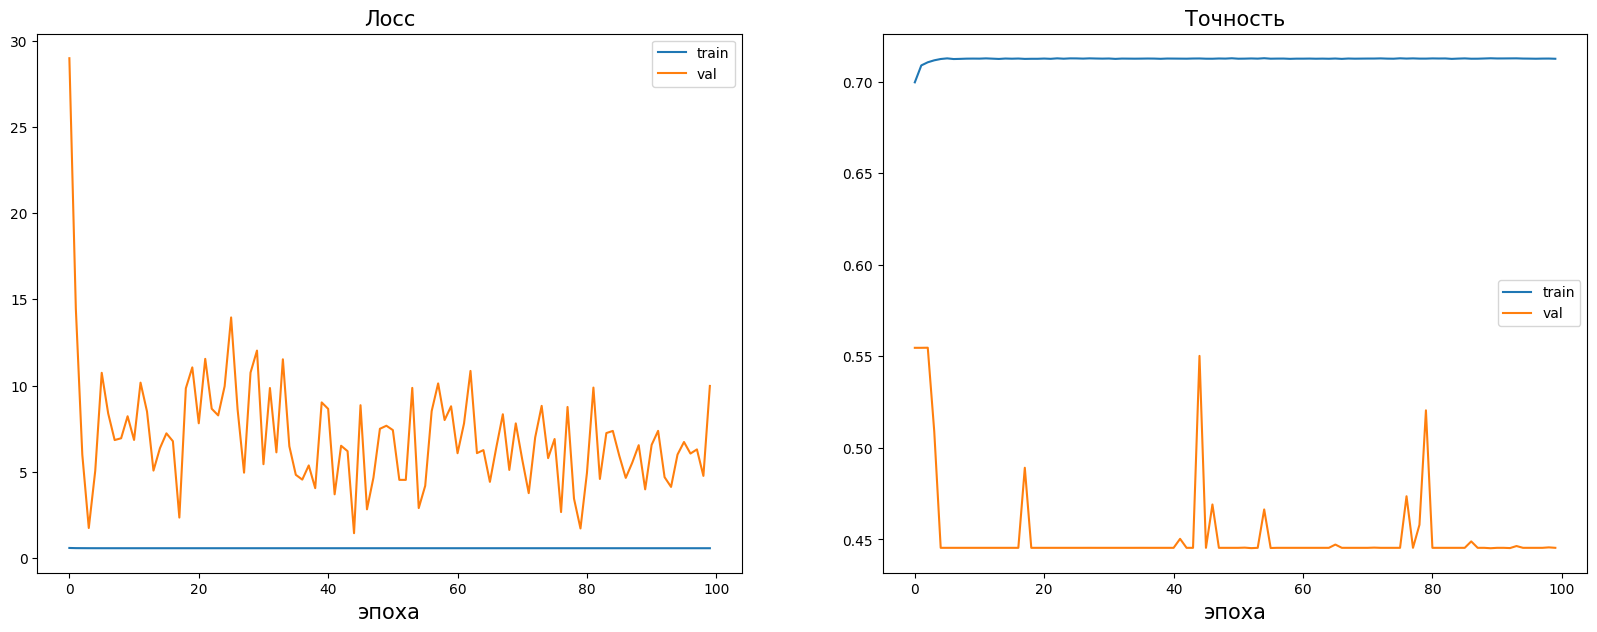

In [26]:
plot_learning_curves(history)

Тестирование

In [27]:
model.eval()
model.cpu()

SimpleModel(
  (linear1): Linear(in_features=9, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=2, bias=True)
)

**Выводы:** Судя по графикам, моя модель не очень хорошо (очень плохо) работает. Возможно, это возникло из-за ошибок в коде или при объявлении модели.Или же это возникло из-за большого количества входных параметров, из-за чего моя всего лишь двуслойная модель не справилась и показала очень плохую точность и потери.